In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import cv2

import os
from os import listdir

print(tf.__version__)

2.10.1


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
#Load the testing images:

TEST_IMGS_MAIN_FOLDER = 'test-cables/test/'
test_images_fname_list = []

#Provide the main folder holding the training images:
def load_test_imgs_in_subfolders(main_folder_path):
    img_list = []

    for subfolder in os.listdir(main_folder_path):
        subfolder_path = os.path.join(main_folder_path, subfolder)

        if os.path.isdir(subfolder_path):
            for img in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, img)
                if img.endswith('png'):
                    file_path = file_path.replace('\\', '/')
                    img_list.append(file_path)

    return img_list


test_images_fname_list = load_test_imgs_in_subfolders(TEST_IMGS_MAIN_FOLDER)
test_images_fname_list = np.array(test_images_fname_list)

print(test_images_fname_list)

['test-cables/test/bent_wire/000.png' 'test-cables/test/bent_wire/001.png'
 'test-cables/test/bent_wire/002.png' 'test-cables/test/bent_wire/003.png'
 'test-cables/test/bent_wire/004.png' 'test-cables/test/bent_wire/005.png'
 'test-cables/test/bent_wire/006.png' 'test-cables/test/bent_wire/007.png'
 'test-cables/test/bent_wire/008.png' 'test-cables/test/bent_wire/009.png'
 'test-cables/test/bent_wire/010.png' 'test-cables/test/bent_wire/011.png'
 'test-cables/test/bent_wire/012.png'
 'test-cables/test/cable_swap/000.png'
 'test-cables/test/cable_swap/001.png'
 'test-cables/test/cable_swap/002.png'
 'test-cables/test/cable_swap/003.png'
 'test-cables/test/cable_swap/004.png'
 'test-cables/test/cable_swap/005.png'
 'test-cables/test/cable_swap/006.png'
 'test-cables/test/cable_swap/007.png'
 'test-cables/test/cable_swap/008.png'
 'test-cables/test/cable_swap/009.png'
 'test-cables/test/cable_swap/010.png'
 'test-cables/test/cable_swap/011.png' 'test-cables/test/combined/000.png'
 'test-c

In [5]:
screwSet = 'train-cables/train/good/'

In [6]:
def get_training_img_fname_list(src_path):
    img_list = []

    for img_fname in os.listdir(src_path):
        if img_fname.endswith("png"):
            img_list.append(src_path + img_fname)

    return img_list


screw_training_img_fname_list = get_training_img_fname_list(screwSet)
print(len(screw_training_img_fname_list))

224


<Figure size 1000x700 with 0 Axes>

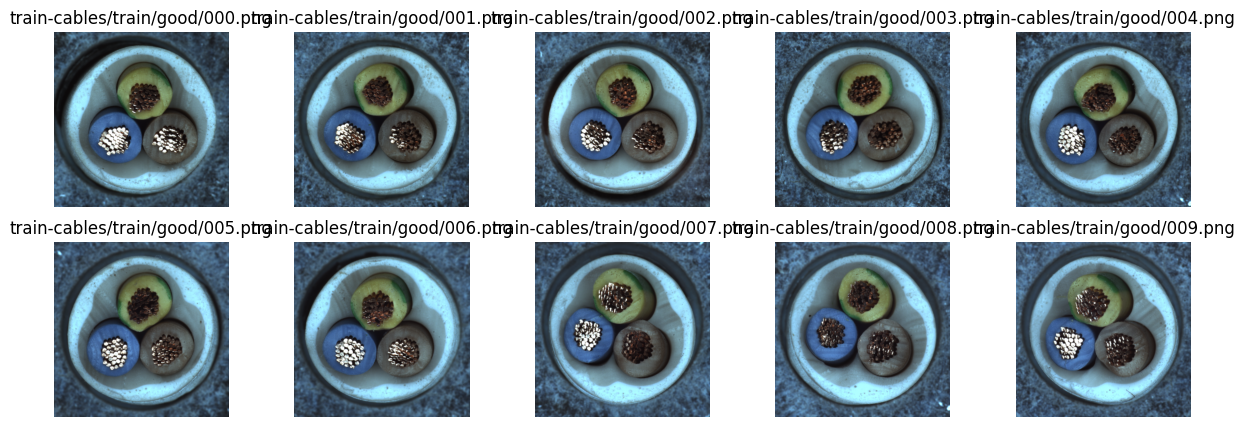

In [7]:
fig = plt.figure(figsize=(10, 7))
first_ten_images = screw_training_img_fname_list[:10]
fig, axes = plt.subplots(2, 5, figsize=(15,5))
axes = axes.ravel()

for i, image_file in enumerate(first_ten_images):

    img_data = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img_rgb)
    axes[i].set_title(image_file)
    axes[i].axis("off")

plt.show()

In [10]:
#Saving one of the good images for the poster. It is in its original format.

# to_save_image = cv2.imread(screw_training_img_fname_list[0])
# cv2.imwrite('good_image_for_poster_1024_1024.jpg', to_save_image)

True

In [7]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.3),
])

extraScrewImages_list = []

#plt.figure(figsize=(10, 10))
target_img_size2 = (100, 100)
brightness = 0.5
contrast = 1.5

for j in range(224):
    image_data = cv2.imread(screw_training_img_fname_list[j])
    image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
    image_data = cv2.addWeighted(image_data, contrast, np.zeros(image_data.shape, image_data.dtype), 0, brightness)
    image_data = cv2.resize(image_data, target_img_size2)
    for i in range(7):
        #ax = plt.subplot(1, 5, i + 1)
#         augmented_image = data_augmentation(tf.expand_dims(image_data,0))
#         extraScrewImages_list.append(augmented_image)
        #plt.imshow(augmented_image[0] / 255)
        #plt.axis('off')
        
        if np.random.rand() > 0.5:
            image_data = tf.image.flip_left_right(image_data)
        
        random_angle = np.random.uniform(-0.3, 0.3)
        augmented_image = tf.keras.preprocessing.image.random_rotation(image_data, random_angle)
        
        extraScrewImages_list.append(augmented_image)
        
print(len(extraScrewImages_list))

1568


In [8]:
print(len(test_images_fname_list))

92


In [9]:
# data_augmentation2 = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.3),
# ])

extraBadScrewImages_list = []

#plt.figure(figsize=(10, 10))
target_img_size3 = (100, 100)
brightness = 0.5
contrast = 1.5

for j in range(92):
    image_data2 = cv2.imread(test_images_fname_list[j])
    image_data2 = cv2.cvtColor(image_data2, cv2.COLOR_BGR2RGB)
    image_data2 = cv2.addWeighted(image_data2, contrast, np.zeros(image_data2.shape, image_data2.dtype), 0, brightness)
    image_data2 = cv2.resize(image_data2, target_img_size3)
    for i in range(7):
        #ax = plt.subplot(1, 5, i + 1)
#         augmented_image2 = data_augmentation2(tf.expand_dims(image_data2,0))
        
        if np.random.rand() > 0.5:
            image_data2 = tf.image.flip_left_right(image_data2)
        
        random_angle = np.random.uniform(-0.3, 0.3)
        augmented_image2 = tf.keras.preprocessing.image.random_rotation(image_data2, random_angle)
        
        extraBadScrewImages_list.append(augmented_image2)
        #plt.imshow(augmented_image[0] / 255)
        #plt.axis('off')

print(len(extraBadScrewImages_list))

644


In [10]:
#extraScrewImages_list = np.array(extraScrewImages_list)
#np.shape(extraScrewImages_list)
# extraScrewImages_list = np.squeeze(extraScrewImages_list, 1)
print(np.shape(extraScrewImages_list))
print(type(extraScrewImages_list))

(1568, 100, 100, 3)
<class 'list'>


In [11]:
# extraBadScrewImages_list = np.squeeze(extraBadScrewImages_list, 1)
print(np.shape(extraBadScrewImages_list))
print(type(extraBadScrewImages_list))

# plt.imshow(extraBadScrewImages_list[100])
# plt.show

(644, 100, 100, 3)
<class 'list'>


<function matplotlib.pyplot.show(close=None, block=None)>

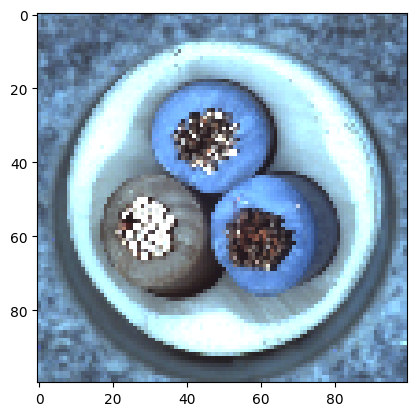

In [12]:
plt.imshow(extraBadScrewImages_list[100]/255)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

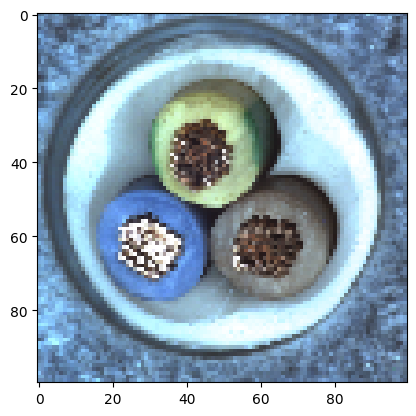

In [13]:
plt.imshow(extraScrewImages_list[100]/255)
plt.show

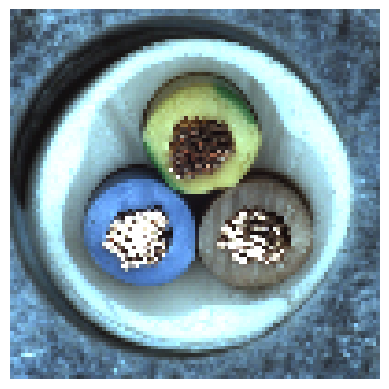

In [20]:
def get_images_pixel_data(img_fname_list):

    img_pixel_data_list = []
    target_img_size = (100, 100)
    brightness = 0.5
    contrast = 1.5

    for img_fname in img_fname_list:
        img_pixel_data = cv2.imread(img_fname)
        img_pixel_data = cv2.cvtColor(img_pixel_data, cv2.COLOR_BGR2RGB)
        img_pixel_data = cv2.addWeighted(img_pixel_data, contrast, np.zeros(img_pixel_data.shape, img_pixel_data.dtype), 0, brightness)
        img_pixel_data = cv2.resize(img_pixel_data, target_img_size)
        img_pixel_data_list.append(img_pixel_data)

    return np.array(img_pixel_data_list)


#X_train = get_images_pixel_data(screw_training_img_fname_list) + get_images_pixel_data(test_images_fname_list)
X_train = get_images_pixel_data(screw_training_img_fname_list)

# plt.imshow(X_train[0])
# plt.axis('off')
# plt.savefig('good_image_for_poster_processed_100_100.png')
#X_train = np.concatenate((X_train, extraScrewImages_list, get_images_pixel_data(test_images_fname_list)), axis=0)
# X_train = np.concatenate((X_train, extraScrewImages_list, extraBadScrewImages_list), axis=0)

#X_train = np.concatenate((X_train, get_images_pixel_data(test_images_fname_list)), axis=0)
#X_train = np.array(X_train)
X_train = X_train.astype('float32')/ 255.
#X_train = X_train[..., tf.newaxis]

In [15]:
print (X_train.shape)

(2436, 100, 100, 3)


In [16]:
screwLabels = []
for i in range(2436):
    if(i < 1792):
        screwLabels.append(1)
    else:
        screwLabels.append(0)

screwLabels = np.array(screwLabels)
print (screwLabels.shape)
print (screwLabels[1791])
print (screwLabels[1792])

(2436,)
1
0


In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train, screwLabels, test_size=0.20, random_state=42)

In [18]:
model_screw = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 3)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
    
    # tf.keras.layers.Input(shape=(200, 200,1)),
    # tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    # # second convolution layer
    # tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # tf.keras.layers.MaxPooling2D((2, 2), strides=2),
 
    # # fully connected classification
    # # single vector
    # tf.keras.layers.Flatten(),

    # #hidden layer and output layer
    # tf.keras.layers.Dense(1024, activation="relu"),
    # tf.keras.layers.Dense(2, activation="softmax")
])

In [19]:
model_screw.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model_screw.fit(X_train2, y_train2, epochs=12)

Epoch 1/12
61/61 [==============================] - 3s 4ms/step - loss: 0.8244 - accuracy: 0.7274
Epoch 2/12
61/61 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7331
Epoch 3/12
61/61 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7618
Epoch 4/12
61/61 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.6448
Epoch 5/12
61/61 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7952
Epoch 6/12
61/61 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8439
Epoch 7/12
61/61 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8778
Epoch 8/12
61/61 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8650
Epoch 9/12
61/61 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9112
Epoch 10/12
61/61 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8429
Epoch 11/12
61/61 [

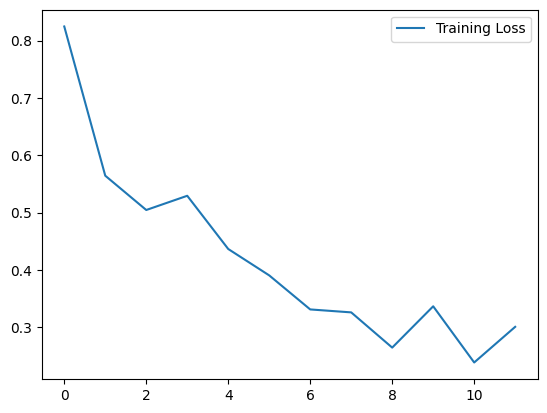

In [21]:
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()

In [22]:
test_screw_loss, test_screw_acc = model_screw.evaluate(X_test2,  y_test2, verbose=2)

print('\nTest accuracy:', test_screw_acc)

16/16 - 0s - loss: 0.9864 - accuracy: 0.2398 - 126ms/epoch - 8ms/step

Test accuracy: 0.2397540956735611


In [23]:
probability_model = tf.keras.Sequential([model_screw, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(get_images_pixel_data(test_images_fname_list))
accuracy_count = 0
for i in range(92):
    if np.argmax(predictions[i]) == 0:
        accuracy_count = accuracy_count + 1

final_accuracy = accuracy_count/92 * 100
print('accuracy:', final_accuracy)
print(predictions[0])

3/3 [==============================] - 0s 1ms/step
accuracy: 100.0
[0.69313 0.30687]


In [26]:
# model_screw.save('Cable-98-Accuracy-db-tf.keras')

In [27]:
# new_model = tf.keras.models.load_model('Cable-96-Accuracy-db-tf.keras')

In [28]:
good_img_path = 'good/' 
good_fname_list = get_training_img_fname_list(good_img_path)

print(good_fname_list)

['good/000.png', 'good/001.png', 'good/002.png', 'good/003.png', 'good/004.png', 'good/005.png', 'good/006.png', 'good/007.png', 'good/008.png', 'good/009.png', 'good/010.png', 'good/011.png', 'good/012.png', 'good/013.png', 'good/014.png', 'good/015.png', 'good/016.png', 'good/017.png', 'good/018.png', 'good/019.png', 'good/020.png', 'good/021.png', 'good/022.png', 'good/023.png', 'good/024.png', 'good/025.png', 'good/026.png', 'good/027.png', 'good/028.png', 'good/029.png', 'good/030.png', 'good/031.png', 'good/032.png', 'good/033.png', 'good/034.png', 'good/035.png', 'good/036.png', 'good/037.png', 'good/038.png', 'good/039.png', 'good/040.png', 'good/041.png', 'good/042.png', 'good/043.png', 'good/044.png', 'good/045.png', 'good/046.png', 'good/047.png', 'good/048.png', 'good/049.png', 'good/050.png', 'good/051.png', 'good/052.png', 'good/053.png', 'good/054.png', 'good/055.png', 'good/056.png', 'good/057.png']


In [29]:
# predictions = probability_model.predict(get_images_pixel_data(test_images_fname_list))
# accuracy_count = 0
# for i in range(92):
#     if np.argmax(predictions[i]) == 0:
#         accuracy_count = accuracy_count + 1

# final_accuracy = accuracy_count/92 * 100
# print('accuracy:', final_accuracy)
# print(predictions[0])

In [30]:
probability_model2 = tf.keras.Sequential([model_screw, 
                                         tf.keras.layers.Softmax()])

predictions2 = probability_model2.predict(get_images_pixel_data(good_fname_list))
accuracy_count2 = 0
for i in range(58):
    if np.argmax(predictions2[i]) == 1:
        accuracy_count2 = accuracy_count2 + 1

final_accuracy2 = accuracy_count2/58 * 100
print('accuracy:', final_accuracy2)
print(predictions2[0])

2/2 [==============================] - 0s 2ms/step
accuracy: 0.0
[0.69313 0.30687]


In [ ]:
probability_model2 = tf.keras.Sequential([model_screw, 
                                         tf.keras.layers.Softmax()])

predictions2 = probability_model2.predict(get_images_pixel_data(test_images_fname_list))
accuracy_count2 = 0
for i in range(92):
    if np.argmax(predictions2[i]) == 0:
        accuracy_count2 = accuracy_count2 + 1

final_accuracy2 = accuracy_count2/92 * 100
print('accuracy:', final_accuracy2)
print(predictions2[0])

In [31]:
# y_test3 = np.zeros(595)
# predictions = model_screw.predict(extraBadScrewImages_list)
# #print('\nTest accuracy:', predictions.shape)
# #print(np.argmax(predictions[0]))
# accuracy_count = 0
# print(predictions)
# for i in range(595):
#     if np.argmax(predictions[i]) == 0:
#         accuracy_count = accuracy_count + 1

# final_accuracy = accuracy_count/595 * 100

# print('accuracy:', final_accuracy)
# print(predictions[0])
# print(np.argmax(predictions[1]))

In [32]:
# # Convert the model.
# converter2 = tf.lite.TFLiteConverter.from_keras_model(model_screw)
# tflite_model2 = converter2.convert()

# # Save the model.
# with open('model_screw2.tflite', 'wb') as f:
#   f.write(tflite_model2)

In [33]:
# def write_to_c_header(arr, filename):
#     with open(filename, 'w') as f:
#         # Write the header guard
#         f.write("#ifndef ARRAY_HEADER_H\n")
#         f.write("#define ARRAY_HEADER_H\n\n")

#         rows, cols = arr.shape
#         f.write(f"const int array_rows = {rows};\n")
#         f.write(f"const int array_cols = {cols};\n\n")

#         f.write(f"const int arr[{rows}][{cols}] = {{\n")

#         for row in arr:
#             row_str = ", ".join(map(str, row))
#             f.write(f"    {{{row_str}}},\n")

#         f.write("};\n\n")
#         f.write("#endif // ARRAY_HEADER_H\n")

# write_to_c_header(X_train[0], 'dynamic_array_header2.h')

In [34]:
# def write_flattened_to_c_header(arr, filename):
#     # Flatten the array
#     flat_arr = arr.flatten()

#     with open(filename, 'w') as f:
#         # Write the header guard
#         f.write("#ifndef ARRAY_HEADER_H\n")
#         f.write("#define ARRAY_HEADER_H\n\n")

#         f.write(f"const int array_size = {flat_arr.size};\n")

#         f.write(f"const int arr[{flat_arr.size}] = {{\n")

#         for i, val in enumerate(flat_arr):
#                     if i < flat_arr.size - 1:
#                         f.write(f"    {val},\n")
#                     else:
#                         f.write(f"    {val}\n")  # No comma after the last element

#         f.write("};\n\n")
#         f.write("#endif // ARRAY_HEADER_H\n")

# write_flattened_to_c_header(X_train[0], 'array_header2.h')

In [35]:
bad_images = get_images_pixel_data(test_images_fname_list)
bad_images = bad_images/255.
bad_images = bad_images.reshape(92, -1)


print(bad_images.shape)

(92, 30000)


In [36]:
# Flatten it
print(bad_images.shape)

(92, 30000)


In [37]:
# header_content = "#ifndef IMAGE_DATA_H\n#define IMAGE_DATA_H\n\n"
# header_content += "const float image_data[{}] = {{\n".format(len(bad_images))
# header_content += ", ".join(map(str, bad_images))
# header_content += "\n};\n\n#endif // IMAGE_DATA_H"

# # Save the content to a .h file
# with open("image_data.h", "w") as f:
#     f.write(header_content)

# print("Header file generated successfully.")

In [38]:
# Create the header content for the C array
# header_content = "#ifndef IMAGE_DATA_H\n#define IMAGE_DATA_H\n\n"
# header_content += "const float image_data[{}][{}] = {{\n".format(10, bad_images.shape[1])

# # Loop through each image and add its flattened array to the header file
# for i in range(10):
#     header_content += "    { " + ", ".join(map(str, bad_images[i])) + " },\n"

# header_content += "};\n\n#endif // IMAGE_DATA_H"

# # Save the content to a .h file
# with open("image_data.h", "w") as f:
#     f.write(header_content)

# print("Header file generated successfully.")

In [40]:
# plt.imshow(single_image_pxl_data[0])

In [41]:
# probability_model = tf.keras.Sequential([model_screw, 
#                                          tf.keras.layers.Softmax()])

# test_images = get_images_pixel_data(test_images_fname_list)
# test_images = test_images.astype('float32')/ 255.

# predictions = probability_model.predict(test_images)
# accuracy_count = 0
# for i in range(92):
#     if np.argmax(predictions[i]) == 0:
#         accuracy_count = accuracy_count + 1

# final_accuracy = accuracy_count/92 * 100
# print('accuracy:', final_accuracy)
# print(predictions[0])

In [42]:
good_images = get_images_pixel_data(good_fname_list)
good_images = good_images/255.
good_images = good_images.reshape(58, -1)

print(good_images.shape)

(58, 30000)


In [ ]:
# header_content = "#ifndef GOOD_IMAGE_DATA_H\n#define GOOD_IMAGE_DATA_H\n\n"
# header_content += "const float good_image_data[{}][{}] = {{\n".format(5, good_images.shape[1])

# # Loop through each image and add its flattened array to the header file
# for i in range(5):
#     header_content += "    { " + ", ".join(map(str, good_images[i])) + " },\n"

# header_content += "};\n\n#endif // IMAGE_DATA_H"

# # Save the content to a .h file
# with open("good_image_data.h", "w") as f:
#     f.write(header_content)

# print("Header file generated successfully.")

In [46]:
num_images = 92
images_per_file = 5

def create_header_file(start_idx, end_idx, file_index):
    header_content = "#ifndef ANOMALY_IMAGE_DATA_{}_H\n#define ANOMALY_IMAGE_DATA_{}_H\n\n".format(file_index, file_index)
    num_images_in_file = end_idx - start_idx
    header_content += "const float image_data[{}][{}] = {{\n".format(num_images_in_file, bad_images.shape[1])
    
    for i in range(start_idx, end_idx):
        header_content += "    { " + ", ".join(map(str, bad_images[i])) + " },\n"
    
    header_content += "}};\n\n#endif // ANOMALY_IMAGE_DATA_{}_H".format(start_idx)
    
    header_filename = f"anomaly_image_data_{file_index}.h"
    with open(header_filename, "w") as f:
        f.write(header_content)
    print(f"Header file {header_filename} generated successfully.")


file_index = 0
for i in range(0, num_images, images_per_file):
    start_idx = i
    end_idx = min(i + images_per_file, num_images)  # Ensure we don't go beyond 92 images
    header_filename = f"image_data_{start_idx}_{end_idx}.h"
    create_header_file(start_idx, end_idx, file_index)
    file_index = file_index + 1

Header file anomaly_image_data_0.h generated successfully.
Header file anomaly_image_data_1.h generated successfully.
Header file anomaly_image_data_2.h generated successfully.
Header file anomaly_image_data_3.h generated successfully.
Header file anomaly_image_data_4.h generated successfully.
Header file anomaly_image_data_5.h generated successfully.
Header file anomaly_image_data_6.h generated successfully.
Header file anomaly_image_data_7.h generated successfully.
Header file anomaly_image_data_8.h generated successfully.
Header file anomaly_image_data_9.h generated successfully.
Header file anomaly_image_data_10.h generated successfully.
Header file anomaly_image_data_11.h generated successfully.
Header file anomaly_image_data_12.h generated successfully.
Header file anomaly_image_data_13.h generated successfully.
Header file anomaly_image_data_14.h generated successfully.
Header file anomaly_image_data_15.h generated successfully.
Header file anomaly_image_data_16.h generated succ

In [47]:
new_model = tf.keras.models.load_model('Cable-98-Accuracy-db-tf.keras')

In [48]:
probability_model2 = tf.keras.Sequential([new_model, 
                                         tf.keras.layers.Softmax()])

predictions2 = probability_model2.predict(get_images_pixel_data(test_images_fname_list))
accuracy_count2 = 0
for i in range(92):
    if np.argmax(predictions2[i]) == 0:
        accuracy_count2 = accuracy_count2 + 1

final_accuracy2 = accuracy_count2/92 * 100
print('accuracy:', final_accuracy2)
print(predictions2[0])

3/3 [==============================] - 0s 2ms/step
accuracy: 98.91304347826086
[1. 0.]


In [49]:
num_images = 58
images_per_file = 5

def create_header_file(start_idx, end_idx, file_index):
    header_content = "#ifndef GOOD_IMAGE_DATA_{}_H\n#define GOOD_IMAGE_DATA_{}_H\n\n".format(file_index, file_index)
    num_images_in_file = end_idx - start_idx
    header_content += "const float image_data[{}][{}] = {{\n".format(num_images_in_file, good_images.shape[1])
    
    for i in range(start_idx, end_idx):
        header_content += "    { " + ", ".join(map(str, good_images[i])) + " },\n"
    
    header_content += "}};\n\n#endif // GOOD_IMAGE_DATA_{}_H".format(start_idx)
    
    header_filename = f"good_image_data_{file_index}.h"
    with open(header_filename, "w") as f:
        f.write(header_content)
    print(f"Header file {header_filename} generated successfully.")


file_index = 0
for i in range(0, num_images, images_per_file):
    start_idx = i
    end_idx = min(i + images_per_file, num_images)  # Ensure we don't go beyond 92 images
    header_filename = f"image_data_{start_idx}_{end_idx}.h"
    create_header_file(start_idx, end_idx, file_index)
    file_index = file_index + 1

Header file good_image_data_0.h generated successfully.
Header file good_image_data_1.h generated successfully.
Header file good_image_data_2.h generated successfully.
Header file good_image_data_3.h generated successfully.
Header file good_image_data_4.h generated successfully.
Header file good_image_data_5.h generated successfully.
Header file good_image_data_6.h generated successfully.
Header file good_image_data_7.h generated successfully.
Header file good_image_data_8.h generated successfully.
Header file good_image_data_9.h generated successfully.
Header file good_image_data_10.h generated successfully.
Header file good_image_data_11.h generated successfully.


In [51]:
probability_model2 = tf.keras.Sequential([new_model, 
                                         tf.keras.layers.Softmax()])

predictions2 = probability_model2.predict(get_images_pixel_data(good_fname_list))
accuracy_count2 = 0
for i in range(58):
    if np.argmax(predictions2[i]) == 1:
        accuracy_count2 = accuracy_count2 + 1

final_accuracy2 = accuracy_count2/58 * 100
print('accuracy:', final_accuracy2)
print(predictions2[0])

2/2 [==============================] - 0s 1ms/step
accuracy: 72.41379310344827
[1. 0.]


In [52]:
# Convert the model.
converter2 = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model2 = converter2.convert()

# Save the model.
with open('Cable-98-Accuracy-db-tflite.tflite', 'wb') as f:
  f.write(tflite_model2)

INFO:tensorflow:Assets written to: C:\Users\DILDOB~1\AppData\Local\Temp\tmph82n507d\assets
